# Introduction

The objective of this lab is to dive into particular kind of neural network: the *Multi-Layer Perceptron* (MLP).

To start, let us take the dataset from the previous lab (hydrodynamics of sailing boats) and use scikit-learn to train a MLP instead of our hand-made single perceptron.
The code below is already complete and is meant to give you an idea of how to construct an MLP with scikit-learn. You can execute it, taking the time to understand the idea behind each cell.

In [1]:
# Importing the dataset
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

dataset = np.genfromtxt("yacht_hydrodynamics.data", delimiter='')
X = dataset[:, :-1]
Y = dataset[:, -1]

In [2]:
# Preprocessing: scale input data 
sc = StandardScaler()
X = sc.fit_transform(X)

In [3]:
# Split dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size = 0.20)

In [4]:
# Define a multi-layer perceptron (MLP) network for regression
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=3000, random_state=1) # define the model, with default params
mlp.fit(x_train, y_train) # train the MLP

MLPRegressor(max_iter=3000, random_state=1)

Train score:  0.9940765369322633
Test score:   0.9899773031580283


Text(0, 0.5, 'Loss')

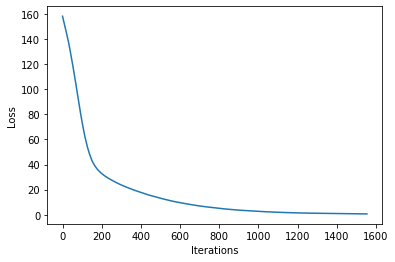

In [5]:
# Evaluate the model
from matplotlib import pyplot as plt

print('Train score: ', mlp.score(x_train, y_train))
print('Test score:  ', mlp.score(x_test, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")


Text(0, 0.5, 'f(examples)')

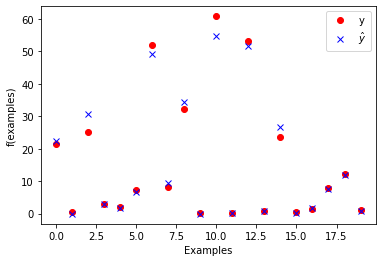

In [6]:
# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
yw = mlp.predict(x_test)
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")

### Analyzing the network

Many details of the network are currently hidden as default parameters.

Using the [documentation of the MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html), answer the following questions.

- What is the structure of the network?
- What it is the algorithm used for training? Is there algorithm available that we mentioned during the courses?
- How does the training algorithm decides to stop the training?

# Onto a more challenging dataset: house prices

For the rest of this lab, we will use the (more challenging) [California Housing Prices dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

In [1]:
# clean all previously defined variables for the sailing boats
%reset -f

In [2]:
"""Import the required modules"""
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

num_samples = 2000 # only use the first N samples to limit training time

cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data,columns=cal_housing.feature_names)[:num_samples]
Y = cal_housing.target[:num_samples]

X.head(10) # print the first 10 values


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25


Note that each row of the dataset represents a **group of houses** (one district). The `target` variable denotes the average house value in units of 100.000 USD. Median Income is per 10.000 USD.

### Extracting a subpart of the dataset for testing

- Split the dataset between a training set (75%) and a test set (25%)

Please use the conventional names `X_train`, `X_test`, `y_train` and `y_test`.

In [3]:
# TODO
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=1, test_size = 0.25)

### Scaling the input data


A step of **scaling** of the data is often useful to ensure that all input data centered on 0 and with a fixed variance.

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance). The function `StandardScaler` from `sklearn.preprocessing` computes the standard score of a sample as:

```
z = (x - u) / s
```

where `u` is the mean of the training samples, and `s` is the standard deviation of the training samples.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

 - Apply the standard scaler to both the training dataset (`X_train`) and the test dataset (`X_test`).
 - Make sure that **exactly the same transformation** is applied to both datasets.

[Documentation of standard scaler in scikit learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)



In [4]:
# Etapes de fit puis de transform sur les jeux de données d'entrainement et de test
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

## Overfitting

In this part, we are only interested in maximizing the **train score**, i.e., having the network memorize the training examples as well as possible.

- Propose a parameterization of the network (shape and learning parameters) that will maximize the train score (without considering the test score).

While doing this, you should (1) remain within two minutes of training time, and (2) obtain a score that is greater than 0.90.

- Is the **test** score substantially smaller than the **train** score (indicator of overfitting) ?
- Explain how the parameters you chose allow the learned model to overfit.

Deux des paramètres choisis ci-dessous influent fortement sur le surentrainement de notre modèle.
Le premier est le shuffle, le second est le n_iter_no_change.

shuffle: en le mettant à false, nous ne mêlangeons pas nos données, ce qui fait que nous avons toujours la même approche de traitement ce qui augmente le surentrainement du modèle.

n_iter_no_change: correspond au nombre de fois maximum où on parcourt notre dataset de test sans amélioration de tolérance. On va entrainer en utilisant beaucoup de fois les mêmes données ce qui augmente le surentrainement du modèle.

In [30]:
# Nous avons décidé de ne pas toucher au solveur de base qui, par défaut est adam, une sorte de descente de gradient
# stochastique comme étudiée dans le précédent notebook même si avec le solveur lbfgs nous avions de très bons résultats
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter=3000, 
                   random_state=1, 
                   shuffle=True, 
                   activation='tanh',
                   alpha=1e-7,
                   learning_rate_init=1e-2,
                   tol=1e-7, 
                   n_iter_no_change = 80,
                   hidden_layer_sizes=(100,100)) # define the model, with default params
mlp.fit(X_train_scaled, y_train) # train the MLP

MLPRegressor(activation='tanh', alpha=1e-07, hidden_layer_sizes=(100, 100),
             learning_rate_init=0.01, max_iter=3000, n_iter_no_change=80,
             random_state=1, tol=1e-07)

Train score:  0.9946219027882813
Test score:   0.3456945395193245


Text(0, 0.5, 'Loss')

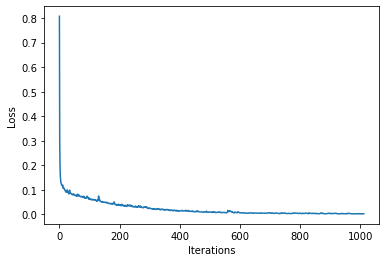

In [31]:
# Evaluate the model
from matplotlib import pyplot as plt

print('Train score: ', mlp.score(X_train_scaled, y_train))
print('Test score:  ', mlp.score(X_test_scaled, y_test))
plt.plot(mlp.loss_curve_)
plt.xlabel("Iterations")
plt.ylabel("Loss")

Nous pouvons constater que le train score est beaucoup plus grand que le test score, signe d'un surentrainement du modèle.

Text(0, 0.5, 'f(examples)')

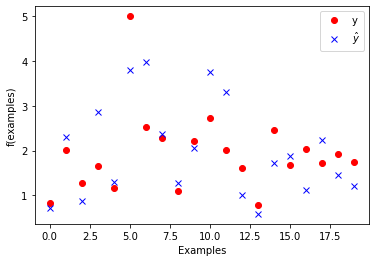

In [7]:
# Plot the results
num_samples_to_plot = 20
plt.plot(y_test[0:num_samples_to_plot], 'ro', label='y')
yw = mlp.predict(X_test_scaled)
plt.plot(yw[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")

## Hyperparameter tuning

In this section, we are now interested in maximizing the ability of the network to predict the value of unseen examples, i.e., maximizing the **test** score.
You should experiment with the possible parameters of the network in order to obtain a good test score, ideally with a small learning time.

Parameters to vary:

- number and size of the hidden layers
- activation function
- stopping conditions
- maximum number of iterations
- initial learning rate value

Results to present for the tested configurations:

- Train/test score
- training time


Present in a table the various parameters tested and the associated results. You can find in the last cell of the notebook a code snippet that will allow you to plot tables from python structure.
Be methodical in the way your run your experiments and collect data. For each run, you should record the parameters and results into an external data structure.

(Note that, while we encourage you to explore the solution space manually, there are existing methods in scikit-learn and other learning framework to automate this step as well, e.g., [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html))

In [17]:
# Code snippet to display a nice table in jupyter notebooks  (remove from report)
import pandas as pd
import time

def hyper_param(X_train,Y_train,X_test,Y_test, max_iters,shuffle_t,early_stopping_t,activation_t,alpha_t,learning_rate_init_t,tol_t,n_iter_no_change_t,hidden_layer_sizes_t):
    
    data = []
    for i in max_iters:
        for j in shuffle_t:
            for z in early_stopping_t:
                for h in activation_t:
                    for k in alpha_t:
                        for l in learning_rate_init_t:
                            for m in tol_t:
                                for n in n_iter_no_change_t:
                                    for t in hidden_layer_sizes_t:
                                        st = time.time()
                                        mlp = MLPRegressor(max_iter=i, 
                                                           random_state=1, 
                                                           shuffle=j,
                                                           early_stopping=z,
                                                           activation=h, 
                                                           alpha=k,
                                                           learning_rate_init=l,
                                                           tol=m, 
                                                           n_iter_no_change = n,
                                                           hidden_layer_sizes=t) 
                                        mlp.fit(X_train, Y_train) # train the MLP 
                                        et = time.time()
                                        elapsed_time = et - st
                                        score = mlp.score(X_test, Y_test)

                                        data.append({'max_iter': i, 'shuffle': j, 'early_stopping': z,
                                                     'activation': h, 'alpha': k, 
                                                     'learning_rate_init' : l, 'tol' : m,
                                                     'n_iter_no_change':n,
                                                     'hidden_layer_sizes': t, 'test_score': score, 'execution time': elapsed_time})
                                        table = pd.DataFrame.from_dict(data)
                                        table = table.replace(np.nan, '-')
                                        table = table.sort_values(by='test_score', ascending=False)
                                        print(table)
    #data.append({'activation': 'relu', 'max_iter': '500', 'test_score': 0.87})
    #data.append({'activation': 'tanh', 'max_iter': '200', 'early_stopping': False, 'test_score': 0.91})
    #data.append({'max_iter': '200', 'shuffle': True, 'activation': 'tanh', 'alpha': '1e-7', 
    #             'learning_rate_init' : '1e-2', 'tol' : '1e-7', 'n_iter_no_change':'80',
    #             'hidden_layer_sizes': '(100,100)', 'test_score': 0.91})

    table = pd.DataFrame.from_dict(data)
    table = table.replace(np.nan, '-')
    table = table.sort_values(by='test_score', ascending=False)
    return table

In [ ]:
max_iters = [2000,
             #3000,
             #5000
            ]
shuffle_t = [#False,  #Après plusieurs tests, les meilleurs résultats étaient quand le shuffle est activé
             True]

early_stopping_t = [True,False]

activation_t = ['relu', # La fonction d'activation qui s'est montrée la plus efficace après plusieurs test est tanh
                'tanh']
alpha_t = [#1e-2,
           1e-3,1e-4, 1e-5
           #, 1e-6 , 1e-7
          ]
learning_rate_init_t = [#1e-1,1e-2,
                        1e-3,1e-4,1e-5
                        #,1e-7,1e-8
                       ]
tol_t = [1e-5 #Après plusieurs tests, la tolérance n'impacte peu le test score entre 1e-5 et 1e-7
         #,1e-7
        ] 
n_iter_no_change_t = [#2,
                      5,8
                      #,10,50,80
                     ]
hidden_layer_sizes_t = [#(10,10),
                        #(100,100),
                        #(30,30,30),
                        #(10,10,10,10),
                        (256,128,64,32),
                        #(32,64,128,256,128,64,32),
                        (512,256,128,64,32),
                        #(1024,512,256,128,64,32)
                        #,(200,200)
                        ]

hyper_param(X_train_scaled,y_train,X_test_scaled,y_test,max_iters,shuffle_t,early_stopping_t,activation_t,alpha_t,learning_rate_init_t,tol_t,n_iter_no_change_t,hidden_layer_sizes_t)

### Première phase Hyperparameter tuning

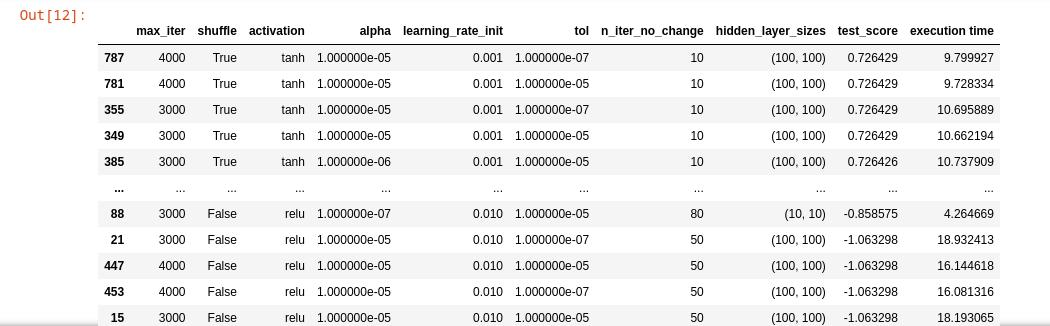

### Deuxième phase Hyperparameter tuning

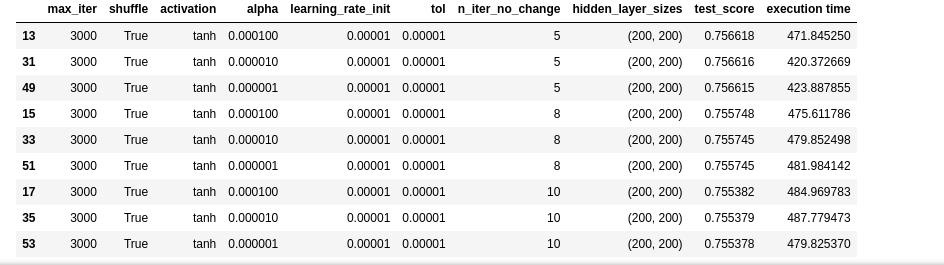

### Troisième phase Hyperparameter tuning

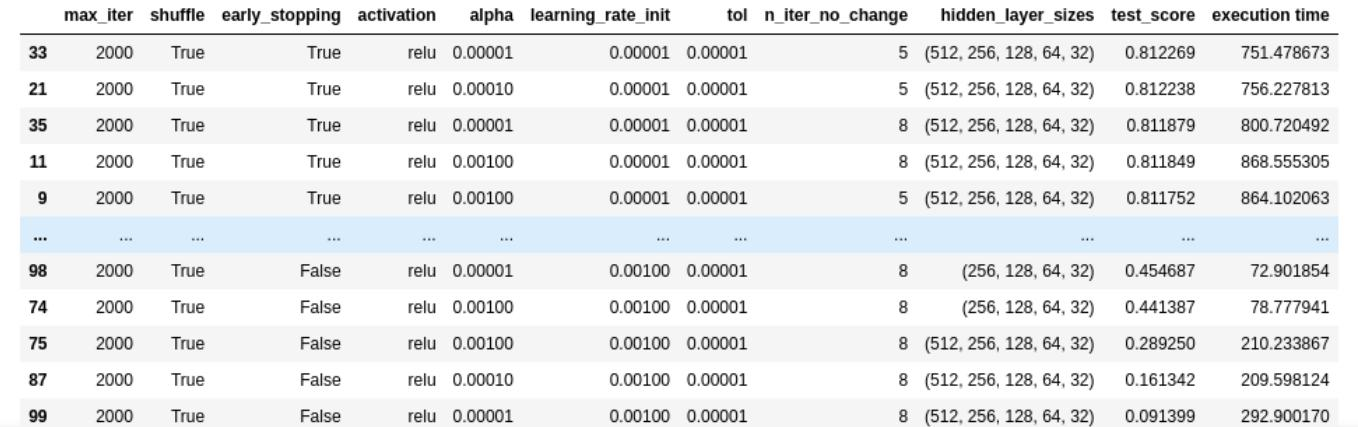

Avec les différentes phases de tests pour trouver des paramètres nous permettant d'avoir un bon test score, la combinaison: max_iter=2000, shuffle=True, early_stopping=True, activation='relu', alpha=1e-5, learning_rate_init=1e-5, tol=1e-5, n_iter_no_change=5, hidden_layer_sizes=(512,256,128,64,32)
nous permet d'avoir un test score de 0.812269 en 12min30 ce qui représente un bon test score selon nous.

## Evaluation

- From your experiments, what seems to be the best model (i.e. set of parameters) for predicting the value of a house?

Unless you used cross-validation, you have probably used the "test" set to select the best model among the ones you experimented with.
Since your model is the one that worked best on the "test" set, your selection is *biased*.

In all rigor the original dataset should be split in three:

- the **training set**, on which each model is trained
- the **validation set**, that is used to pick the best parameters of the model 
- the **test set**, on which we evaluate the final model


Evaluate the score of your algorithm on a test set that was not used for training nor for model selection.



In [18]:
# 75% du dataset pour l'entrainement et 25% pour les tests
X_train_eval, X_test_eval, y_train_eval, y_test_eval = train_test_split(X, Y,random_state=1, test_size = 0.20)

# 80% du dataset d'entrainement pour l'entrainement et 20% pour la validation
X_train_eval, X_val_eval, y_train_eval, y_val_eval = train_test_split(X_train_eval, y_train_eval,random_state=1, test_size = 0.20)

# Mise à l'échelle des données d'entrée
X_train_eval_scaled = sc.fit_transform(X_train_eval)
X_test_eval_scaled = sc.fit_transform(X_test_eval)
X_val_eval_scaled = sc.fit_transform(X_val_eval)

In [19]:
# Phase hyperparameter tuning
hyper_param(X_train_eval_scaled,y_train_eval,X_val_eval_scaled,y_val_eval,[2000],[True],[True],['relu'],[1e-3,1e-4],[1e-4,1e-5],[1e-5],[5,10],[(512,256,128,64,32),(1024,256,128,64,32)])

   max_iter  shuffle  early_stopping activation  alpha  learning_rate_init  \
0      2000     True            True       relu  0.001              0.0001   

       tol  n_iter_no_change       hidden_layer_sizes  test_score  \
0  0.00001                 5  (512, 256, 128, 64, 32)    0.760976   

   execution time  
0      105.454813  
   max_iter  shuffle  early_stopping activation  alpha  learning_rate_init  \
0      2000     True            True       relu  0.001              0.0001   
1      2000     True            True       relu  0.001              0.0001   

       tol  n_iter_no_change        hidden_layer_sizes  test_score  \
0  0.00001                 5   (512, 256, 128, 64, 32)    0.760976   
1  0.00001                 5  (1024, 256, 128, 64, 32)    0.748594   

   execution time  
0      105.454813  
1      132.822384  
   max_iter  shuffle  early_stopping activation  alpha  learning_rate_init  \
0      2000     True            True       relu  0.001              0.0001   
2 

   max_iter  shuffle  early_stopping activation   alpha  learning_rate_init  \
8      2000     True            True       relu  0.0001             0.00010   
0      2000     True            True       relu  0.0010             0.00010   
6      2000     True            True       relu  0.0010             0.00001   
2      2000     True            True       relu  0.0010             0.00010   
4      2000     True            True       relu  0.0010             0.00001   
3      2000     True            True       relu  0.0010             0.00010   
1      2000     True            True       relu  0.0010             0.00010   
7      2000     True            True       relu  0.0010             0.00001   
9      2000     True            True       relu  0.0001             0.00010   
5      2000     True            True       relu  0.0010             0.00001   

       tol  n_iter_no_change        hidden_layer_sizes  test_score  \
8  0.00001                 5   (512, 256, 128, 64, 32)    0.

    max_iter  shuffle  early_stopping activation   alpha  learning_rate_init  \
10      2000     True            True       relu  0.0001             0.00010   
8       2000     True            True       relu  0.0001             0.00010   
0       2000     True            True       relu  0.0010             0.00010   
6       2000     True            True       relu  0.0010             0.00001   
2       2000     True            True       relu  0.0010             0.00010   
12      2000     True            True       relu  0.0001             0.00001   
4       2000     True            True       relu  0.0010             0.00001   
3       2000     True            True       relu  0.0010             0.00010   
1       2000     True            True       relu  0.0010             0.00010   
7       2000     True            True       relu  0.0010             0.00001   
9       2000     True            True       relu  0.0001             0.00010   
11      2000     True            True   

,max_iter,shuffle,early_stopping,activation,alpha,learning_rate_init,tol,n_iter_no_change,hidden_layer_sizes,test_score,execution time
10,2000,True,True,relu,0.0001,0.00010,0.00001,10,"(512, 256, 128, 64, 32)",0.763459,71.075352
8,2000,True,True,relu,0.0001,0.00010,0.00001,5,"(512, 256, 128, 64, 32)",0.761582,60.795585
0,2000,True,True,relu,0.0010,0.00010,0.00001,5,"(512, 256, 128, 64, 32)",0.760976,105.454813
14,2000,True,True,relu,0.0001,0.00001,0.00001,10,"(512, 256, 128, 64, 32)",0.756739,471.158393
6,2000,True,True,relu,0.0010,0.00001,0.00001,10,"(512, 256, 128, 64, 32)",0.756568,326.413098
2,2000,True,True,relu,0.0010,0.00010,0.00001,10,"(512, 256, 128, 64, 32)",0.752082,137.862324
12,2000,True,True,relu,0.0001,0.00001,0.00001,5,"(512, 256, 128, 64, 32)",0.749876,268.323483
4,2000,True,True,relu,0.0010,0.00001,0.00001,5,"(512, 256, 128, 64, 32)",0.749702,404.404614
3,2000,True,True,relu,0.0010,0.00010,0.00001,10,"(1024, 256, 128, 64, 32)",0.748922,239.158899
1,2000,True,True,relu,0.0010,0.00010,0.00001,5,"(1024, 256, 128, 64, 32)",0.748594,132.822384


In [24]:
#Entrainement du modèle avec les paramètres décidés
mlp = MLPRegressor(max_iter=2000, 
                   random_state=1, 
                   shuffle=True,
                   early_stopping=True,
                   activation='relu', 
                   alpha=1e-4,
                   learning_rate_init=1e-4,
                   tol=1e-5, 
                   n_iter_no_change =10,
                   hidden_layer_sizes=(512,256,128,64,32)) 
mlp.fit(X_train_eval_scaled, y_train_eval) # train the MLP 
print("test score:", mlp.score(X_val_eval_scaled, y_val_eval))

test score: 0.7634593058601822


Text(0, 0.5, 'f(examples)')

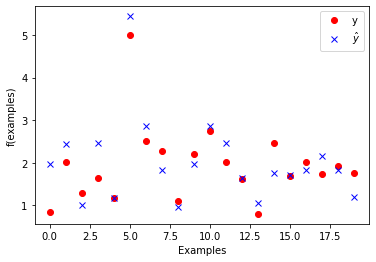

In [25]:
# Prédiction de notre modèle sur le dataset de test et évaluation de la précision
num_samples_to_plot = 20
plt.plot(y_test_eval[0:num_samples_to_plot], 'ro', label='y')
yw_eval = mlp.predict(X_test_eval_scaled)
plt.plot(yw_eval[0:num_samples_to_plot], 'bx', label='$\hat{y}$')
plt.legend()
plt.xlabel("Examples")
plt.ylabel("f(examples)")

In [27]:
# Affichage du r2 de notre modèle
from sklearn import metrics
print("R2:",metrics.r2_score(y_test_eval,yw_eval))

R2: 0.7970996919558182


Plus le R2 est proche de 1, plus notre modèle est précis dans ses prédictions. Nous obtenons un R2 de 0.80. Nous avons donc un bon modèle pour ce dataset.